# MODELO PREDICTIVO DEL PRECIO DEL DIAMANTE
# MACHINE LEARNING PROJECT
### by TARIK EL HANNACH ARCHI

#### THE BRIDGE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/diamonds.csv')
data

diamond_id     shape   size color fancy_color_dominant_color  \
0        131328926     Round   0.09     E                        NaN   
1        131704776     Round   0.09     E                        NaN   
2        131584417     Round   0.09     E                        NaN   
3        131584416     Round   0.09     E                        NaN   
4        131613644     Round   0.09     E                        NaN   
...            ...       ...    ...   ...                        ...   
219699   135619262     Round  10.65     E                        NaN   
219700   135122237   Radiant   5.17   NaN                      Green   
219701   135553116     Round  18.07     E                        NaN   
219702   114752541  Princess   0.90   NaN                        Red   
219703   129630500      Pear  10.03   NaN                     Yellow   

       fancy_color_secondary_color fancy_color_overtone fancy_color_intensity  \
0                              NaN                  NaN                   NaN   
1                              NaN                  NaN                   NaN   
2                              NaN                  NaN                   NaN   
3                              NaN                  NaN                   NaN   
4                              NaN                  NaN                   NaN   
...                            ...                  ...                   ...   
219699                         NaN                  NaN                   NaN   
219700                         NaN                 None           Fancy Light   
219701                         NaN                  NaN                   NaN   
219702                         NaN                  NaN                 Fancy   
219703                         NaN                  NaN           Fancy Vivid   

       clarity        cut  ... girdle_min girdle_max  culet_size  \
0         VVS2  Excellent  ...          M          M           N   
1         VVS2  Very Good  ...        STK        STK           N   
2         VVS2  Excellent  ...         TN          M         NaN   
3         VVS2  Excellent  ...          M        STK         NaN   
4         VVS2  Very Good  ...        STK        STK           N   
...        ...        ...  ...        ...        ...         ...   
219699     VS1  Excellent  ...          M        STK           N   
219700     VS2        NaN  ...         TK        XTK         NaN   
219701     VS1  Excellent  ...         TN          M           N   
219702     SI2        NaN  ...        XTN        VTK           N   
219703    VVS2        NaN  ...        NaN        NaN         NaN   

        culet_condition  fluor_color  fluor_intensity  lab total_sales_price  \
0                   NaN          NaN             None  IGI               200   
1                   NaN          NaN             None  IGI               200   
2                   NaN          NaN             None  IGI               200   
3                   NaN          NaN             None  IGI               200   
4                   NaN          NaN             None  IGI               200   
...                 ...          ...              ...  ...               ...   
219699              NaN          NaN             None  GIA           1210692   
219700              NaN          NaN             None  GIA           1292500   
219701              NaN          NaN             None  GIA           1315496   
219702              NaN          NaN            Faint  GIA           1350000   
219703              NaN          NaN             None  GIA           1449881   

       eye_clean        date  
0            NaN  2022-02-24  
1            NaN  2022-02-24  
2            NaN  2022-02-24  
3            NaN  2022-02-24  
4            NaN  2022-02-24  
...          ...         ...  
219699       NaN  2022-02-24  
219700       NaN  2022-02-24  
219701       NaN  2022-02-24  
219702       NaN  2022-02-24  
219703       NaN  2022-02-24  

[219704 rows x 27 c

# Procedemos a realizar un pequeño analisis exploratorio del dataset en el que vamos a trabajar

In [5]:
# Tamaño de mi dataset
data.shape

(219704, 27)

In [6]:
# Info destacable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

In [7]:
data.dtypes

diamond_id                       int64
shape                           object
size                           float64
color                           object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
clarity                         object
cut                             object
symmetry                        object
polish                          object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
culet_size                      object
culet_condition                 object
fluor_color                     object
fluor_intensity                 object
lab                             object
total_sales_price                int64
eye_clean                

In [8]:
# Busco los valores NaN que contiene
data.isnull().sum()

diamond_id                          0
shape                               0
size                                0
color                            9162
fancy_color_dominant_color     210540
fancy_color_secondary_color    218642
fancy_color_overtone           217666
fancy_color_intensity          210542
clarity                             0
cut                             60607
symmetry                            0
polish                              0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                      83433
girdle_max                      84296
culet_size                      85741
culet_condition                204385
fluor_color                    203978
fluor_intensity                   128
lab                                 0
total_sales_price                   0
eye_clean                      156917
date        

In [4]:
import pandas_profiling

pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### - Podemos observar que de las 27 columnas de las que dispone nuestro dataset hay al menos 14 columnas con algun valor vacio. Procedemos a la limpieza, eliminando las columnas que tengan mas de 80.000 valores vacios.

In [9]:
columns = [columns for columns in data.columns if data[columns].isna().sum() >= 80000]
data1 = data.drop(columns, axis=1 )
data1

diamond_id     shape   size color clarity        cut   symmetry  \
0        131328926     Round   0.09     E    VVS2  Excellent  Very Good   
1        131704776     Round   0.09     E    VVS2  Very Good  Very Good   
2        131584417     Round   0.09     E    VVS2  Excellent  Very Good   
3        131584416     Round   0.09     E    VVS2  Excellent  Very Good   
4        131613644     Round   0.09     E    VVS2  Very Good  Very Good   
...            ...       ...    ...   ...     ...        ...        ...   
219699   135619262     Round  10.65     E     VS1  Excellent  Excellent   
219700   135122237   Radiant   5.17   NaN     VS2        NaN  Very Good   
219701   135553116     Round  18.07     E     VS1  Excellent  Excellent   
219702   114752541  Princess   0.90   NaN     SI2        NaN       Good   
219703   129630500      Pear  10.03   NaN    VVS2        NaN  Very Good   

           polish  depth_percent  table_percent  meas_length  meas_width  \
0       Very Good           62.7           59.0         2.85        2.87   
1       Very Good           61.9           59.0         2.84        2.89   
2       Very Good           61.1           59.0         2.88        2.90   
3       Very Good           62.0           59.0         2.86        2.88   
4       Excellent           64.9           58.5         2.79        2.83   
...           ...            ...            ...          ...         ...   
219699  Excellent           61.3           58.0        14.06       14.18   
219700  Very Good           64.8           65.0        11.55        8.81   
219701  Excellent           60.2           59.0        17.06       17.10   
219702       Good           70.8           72.0         5.22        4.90   
219703  Excellent           66.7           65.0        15.61       11.09   

        meas_depth fluor_intensity  lab  total_sales_price        date  
0             1.79            None  IGI                200  2022-02-24  
1             1.78            None  IGI                200  2022-02-24  
2             1.77            None  IGI                200  2022-02-24  
3             1.78            None  IGI                200  2022-02-24  
4             1.82            None  IGI                200  2022-02-24  
...            ...             ...  ...                ...         ...  
219699        8.66            None  GIA            1210692  2022-02-24  
219700        5.71            None  GIA            1292500  2022-02-24  
219701       10.20            None  GIA            1315496  2022-02-24  
219702        3.47           Faint  GIA            1350000  2022-02-24  
219703        7.39            None  GIA            1449881  2022-02-24  

[219704 rows x 17 columns]

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   diamond_id         219704 non-null  int64  
 1   shape              219704 non-null  object 
 2   size               219704 non-null  float64
 3   color              210542 non-null  object 
 4   clarity            219704 non-null  object 
 5   cut                159097 non-null  object 
 6   symmetry           219704 non-null  object 
 7   polish             219704 non-null  object 
 8   depth_percent      219704 non-null  float64
 9   table_percent      219704 non-null  float64
 10  meas_length        219704 non-null  float64
 11  meas_width         219704 non-null  float64
 12  meas_depth         219704 non-null  float64
 13  fluor_intensity    219576 non-null  object 
 14  lab                219704 non-null  object 
 15  total_sales_price  219704 non-null  int64  
 16  da

### - Seguimos con la limpieza, y volvemos a comprobar los valores vacios.

In [11]:
data1.isna().sum()

diamond_id               0
shape                    0
size                     0
color                 9162
clarity                  0
cut                  60607
symmetry                 0
polish                   0
depth_percent            0
table_percent            0
meas_length              0
meas_width               0
meas_depth               0
fluor_intensity        128
lab                      0
total_sales_price        0
date                     0
dtype: int64

In [12]:
data1.describe(include = 'all') 

diamond_id   shape           size   color clarity        cut  \
count   2.197040e+05  219704  219704.000000  210542  219704     159097   
unique           NaN      11            NaN      10      11          6   
top              NaN   Round            NaN       E     SI1  Excellent   
freq             NaN  158316            NaN   33103   38628     124861   
mean    1.281166e+08     NaN       0.755176     NaN     NaN        NaN   
std     1.320737e+07     NaN       0.845892     NaN     NaN        NaN   
min     9.666855e+06     NaN       0.080000     NaN     NaN        NaN   
25%     1.275641e+08     NaN       0.310000     NaN     NaN        NaN   
50%     1.326076e+08     NaN       0.500000     NaN     NaN        NaN   
75%     1.348523e+08     NaN       1.000000     NaN     NaN        NaN   
max     1.361475e+08     NaN      19.350000     NaN     NaN        NaN   

         symmetry     polish  depth_percent  table_percent    meas_length  \
count      219704     219704  219704.000000  219704.000000  219704.000000   
unique          5          5            NaN            NaN            NaN   
top     Excellent  Excellent            NaN            NaN            NaN   
freq       131619     175806            NaN            NaN            NaN   
mean          NaN        NaN      61.683794      57.747579       5.548867   
std           NaN        NaN       9.915251       9.959906       1.763932   
min           NaN        NaN       0.000000       0.000000       0.000000   
25%           NaN        NaN      61.200000      57.000000       4.350000   
50%           NaN        NaN      62.400000      58.000000       5.060000   
75%           NaN        NaN      63.500000      60.000000       6.350000   
max           NaN        NaN      98.700000      94.000000      93.660000   

           meas_width     meas_depth fluor_intensity     lab  \
count   219704.000000  219704.000000          219576  219704   
unique            NaN            NaN               7       3   
top               NaN            NaN            None     GIA   
freq              NaN            NaN          143491  200434   
mean         5.135623       3.285698             NaN     NaN   
std          1.374527       2.054817             NaN     NaN   
min          0.000000       0.000000             NaN     NaN   
25%          4.310000       2.680000             NaN     NaN   
50%          4.800000       3.030000             NaN     NaN   
75%          5.700000       3.630000             NaN     NaN   
max         62.300000      76.300000             NaN     NaN   

        total_sales_price        date  
count        2.197040e+05      219704  
unique                NaN           1  
top                   NaN  2022-02-24  
freq                  NaN      219704  
mean         6.908035e+03         NaN  
std          2.595944e+04         NaN  
min          2.000000e+02         NaN  
25%          9.580000e+02         NaN  
50%          1.970000e+03         NaN  
75%          5.207000e+03         NaN  
max          1.449881e+06         NaN

### - Nos desahecmos de todos los valores, E IGUALAMOS TODAS LAS COLUMNAS!!!

In [13]:
igualador = [column for column in data1.columns if data1[column].isna().sum() > 0]

for column in igualador:
    data1[column] = data1[column].fillna(data1[column].value_counts().index[0])

df = data1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   diamond_id         219704 non-null  int64  
 1   shape              219704 non-null  object 
 2   size               219704 non-null  float64
 3   color              219704 non-null  object 
 4   clarity            219704 non-null  object 
 5   cut                219704 non-null  object 
 6   symmetry           219704 non-null  object 
 7   polish             219704 non-null  object 
 8   depth_percent      219704 non-null  float64
 9   table_percent      219704 non-null  float64
 10  meas_length        219704 non-null  float64
 11  meas_width         219704 non-null  float64
 12  meas_depth         219704 non-null  float64
 13  fluor_intensity    219704 non-null  object 
 14  lab                219704 non-null  object 
 15  total_sales_price  219704 non-null  int64  
 16  da

In [18]:
df.isna().sum()

shape                0
size                 0
color                0
clarity              0
cut                  0
symmetry             0
polish               0
depth_percent        0
table_percent        0
meas_length          0
meas_width           0
meas_depth           0
fluor_intensity      0
lab                  0
total_sales_price    0
date                 0
dtype: int64

### - Nos deshacemos del id de cada diamante, ya que no nos aporta ningun valor a la hora de realizar la prediccion.

In [14]:
df = df.drop('diamond_id', axis=1)
df

shape   size color clarity        cut   symmetry     polish  \
0          Round   0.09     E    VVS2  Excellent  Very Good  Very Good   
1          Round   0.09     E    VVS2  Very Good  Very Good  Very Good   
2          Round   0.09     E    VVS2  Excellent  Very Good  Very Good   
3          Round   0.09     E    VVS2  Excellent  Very Good  Very Good   
4          Round   0.09     E    VVS2  Very Good  Very Good  Excellent   
...          ...    ...   ...     ...        ...        ...        ...   
219699     Round  10.65     E     VS1  Excellent  Excellent  Excellent   
219700   Radiant   5.17     E     VS2  Excellent  Very Good  Very Good   
219701     Round  18.07     E     VS1  Excellent  Excellent  Excellent   
219702  Princess   0.90     E     SI2  Excellent       Good       Good   
219703      Pear  10.03     E    VVS2  Excellent  Very Good  Excellent   

        depth_percent  table_percent  meas_length  meas_width  meas_depth  \
0                62.7           59.0         2.85        2.87        1.79   
1                61.9           59.0         2.84        2.89        1.78   
2                61.1           59.0         2.88        2.90        1.77   
3                62.0           59.0         2.86        2.88        1.78   
4                64.9           58.5         2.79        2.83        1.82   
...               ...            ...          ...         ...         ...   
219699           61.3           58.0        14.06       14.18        8.66   
219700           64.8           65.0        11.55        8.81        5.71   
219701           60.2           59.0        17.06       17.10       10.20   
219702           70.8           72.0         5.22        4.90        3.47   
219703           66.7           65.0        15.61       11.09        7.39   

       fluor_intensity  lab  total_sales_price        date  
0                 None  IGI                200  2022-02-24  
1                 None  IGI                200  2022-02-24  
2                 None  IGI                200  2022-02-24  
3                 None  IGI                200  2022-02-24  
4                 None  IGI                200  2022-02-24  
...                ...  ...                ...         ...  
219699            None  GIA            1210692  2022-02-24  
219700            None  GIA            1292500  2022-02-24  
219701            None  GIA            1315496  2022-02-24  
219702           Faint  GIA            1350000  2022-02-24  
219703            None  GIA            1449881  2022-02-24  

[219704 rows x 16 columns]

## Hay diversos factores que afectan al valor del diamante, a continuación vamos a analizar algunas:


### - COLOR
#### Mientras más incoloro es el diamante, mayor será su valor; en cambio, mientras tenga una coloración amarillenta o marrón, el precio será menor.

In [16]:
df.color.value_counts()

E    42265
F    31566
D    30873
G    29184
H    26073
I    22364
J    16898
K    11750
L     5683
M     3048
Name: color, dtype: int64

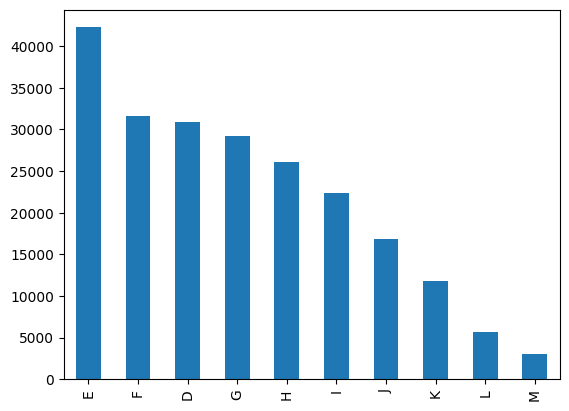

In [17]:
df.color.value_counts().plot(kind='bar');

### - SHAPE O FORMA
#### Para que el corte del diamante alcance los estándares de calidad requeridos y obtenga una certificación aprobatoria del laboratorio Gemological Institute Of America (GIA), no debe ser demasiado profundo, ni muy superficial; sino lo más preciso posible. El diamante corte redondo o con talla brillante es el más valioso debido al porcentaje de perfección alcanzado con su simetría y pulido. Es considerado el más clásico. Las principales formas de talla son: marquesa, corazón, esmeralda, princesa, ovalada, radiante y lágrima.

In [25]:
df['shape'].value_counts()

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2917
Asscher               1696
Cushion                529
Name: shape, dtype: int64

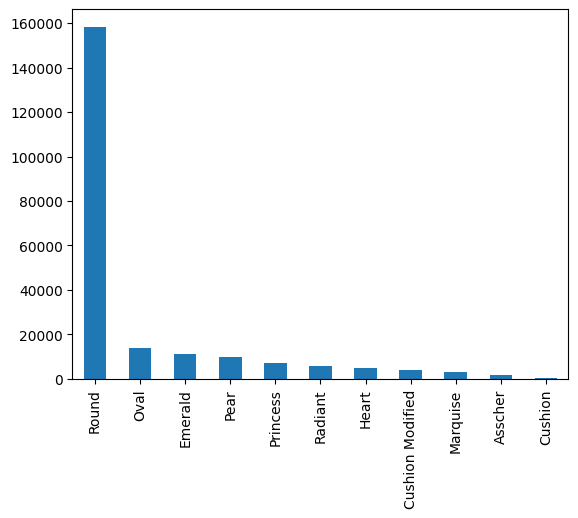

In [26]:
df['shape'].value_counts().plot(kind='bar');

### - CUT O TALLA
#### La talla o corte uno de los aspectos fundamentales en los diamantes, pues permite conocer su brillo. El corte en las proporciones adecuadas refleja gran parte de su valor, porque determinará el tamaño del diamante, su equilibrio y simetría

In [27]:
df.cut.value_counts()

Excellent    185468
Very Good     34201
Good             28
Fair              5
None              1
Ideal             1
Name: cut, dtype: int64

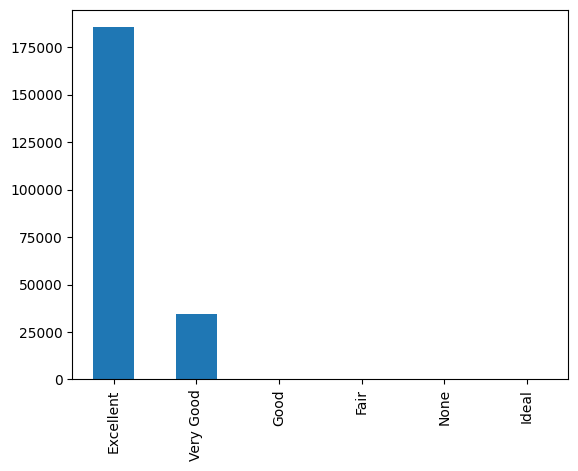

In [28]:
df.cut.value_counts().plot(kind='bar');

### - CLARIDAD
#### Al haberse encontrado a aproximadamente 200 kilómetros de profundidad como carbono puro cristalizado y con la presencia de algunos minerales, podrían aparecer algunas inclusiones internas y manchas externas. En el mejor de los casos son difíciles de observar aún con un microscopio especial 10x, lo que permite que su valor aumente

In [29]:
df.clarity.value_counts()

SI1     38628
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

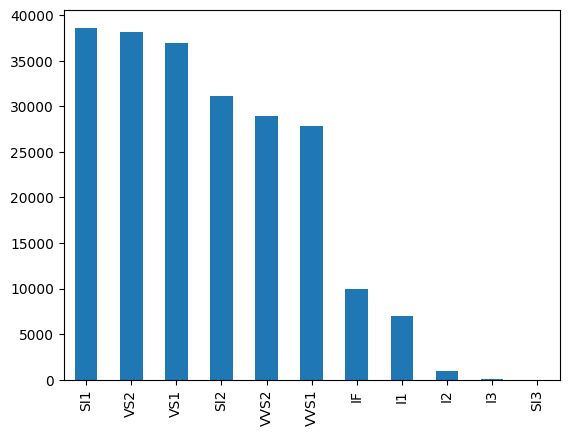

In [30]:
df.clarity.value_counts().plot(kind='bar');

### - SIMETRIA

In [33]:
df.symmetry.value_counts()

Excellent    131619
Very Good     83144
Good           4609
Fair            325
Poor              7
Name: symmetry, dtype: int64

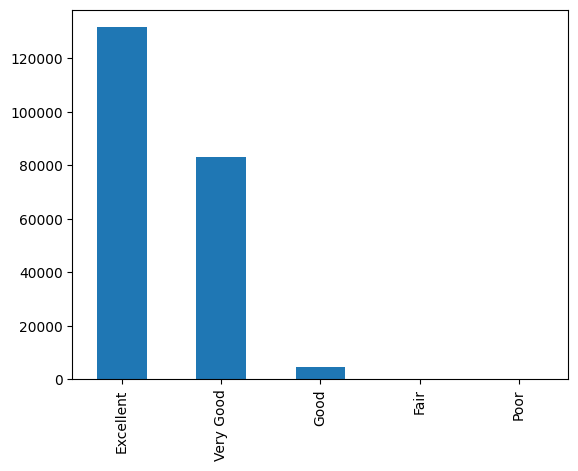

In [32]:
df.symmetry.value_counts().plot(kind='bar');

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shape              219704 non-null  object 
 1   size               219704 non-null  float64
 2   color              219704 non-null  object 
 3   clarity            219704 non-null  object 
 4   cut                219704 non-null  object 
 5   symmetry           219704 non-null  object 
 6   polish             219704 non-null  object 
 7   depth_percent      219704 non-null  float64
 8   table_percent      219704 non-null  float64
 9   meas_length        219704 non-null  float64
 10  meas_width         219704 non-null  float64
 11  meas_depth         219704 non-null  float64
 12  fluor_intensity    219704 non-null  object 
 13  lab                219704 non-null  object 
 14  total_sales_price  219704 non-null  int64  
 15  date               219704 non-null  object 
dtypes:

### - La columna date tampoco nos aporta nada, asi que procedemos a quitarla.

In [38]:
df = df.drop('date', axis=1)
columns1 = df.select_dtypes(include=['object']).columns
df[columns1] = df[columns1].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   shape              219704 non-null  category
 1   size               219704 non-null  float64 
 2   color              219704 non-null  category
 3   clarity            219704 non-null  category
 4   cut                219704 non-null  category
 5   symmetry           219704 non-null  category
 6   polish             219704 non-null  category
 7   depth_percent      219704 non-null  float64 
 8   table_percent      219704 non-null  float64 
 9   meas_length        219704 non-null  float64 
 10  meas_width         219704 non-null  float64 
 11  meas_depth         219704 non-null  float64 
 12  fluor_intensity    219704 non-null  category
 13  lab                219704 non-null  category
 14  total_sales_price  219704 non-null  int64   
dtypes: category(8), float64(6), int64(

### - Label encoder

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in columns1:
    n = df[i].nunique()
    df = pd.concat([df, pd.DataFrame(le.fit_transform(df[i]))], axis=1)

df.drop(columns1, axis=1, inplace=True)

In [40]:
df.drop_duplicates(inplace=True)

In [52]:
df.columns = ['size','color','cut','depth_percent','table_percent','meas_length', 'meas_width', 'meas_depth', 'total_sales_price'] + [str(i) for i in range(6)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215573 entries, 0 to 219703
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   size               215573 non-null  float64
 1   color              215573 non-null  float64
 2   cut                215573 non-null  float64
 3   depth_percent      215573 non-null  float64
 4   table_percent      215573 non-null  float64
 5   meas_length        215573 non-null  float64
 6   meas_width         215573 non-null  int64  
 7   meas_depth         215573 non-null  int64  
 8   total_sales_price  215573 non-null  int64  
 9   0                  215573 non-null  int64  
 10  1                  215573 non-null  int64  
 11  2                  215573 non-null  int64  
 12  3                  215573 non-null  int64  
 13  4                  215573 non-null  int64  
 14  5                  215573 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 26.3 MB


### - DEJAMOS YA EL EDA Y COMENZAMOS CON EL MODELO

In [70]:
x, y = df.drop('total_sales_price', axis=1), df.total_sales_price

In [71]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size=0.2)

In [72]:
print(f'Las dimensiones del array xtrain son :{xtrain.shape}')
print(f'Las dimensiones del array xtest son :{xtest.shape}')
print(f'Las dimensiones del array ytrain son :{ytrain.shape}')
print(f'Las dimensiones del array ytest son :{ytest.shape}')

Las dimensiones del array xtrain son :(172458, 14)
Las dimensiones del array xtest son :(43115, 14)
Las dimensiones del array ytrain son :(172458,)
Las dimensiones del array ytest son :(43115,)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


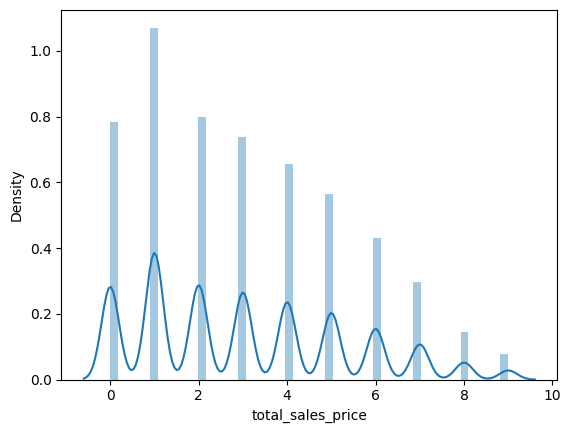

In [53]:
sns.distplot(df['total_sales_price']);

In [73]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

xtrain_scaled = mms.fit_transform(xtrain)

xtrain_scaled.shape

(172458, 14)

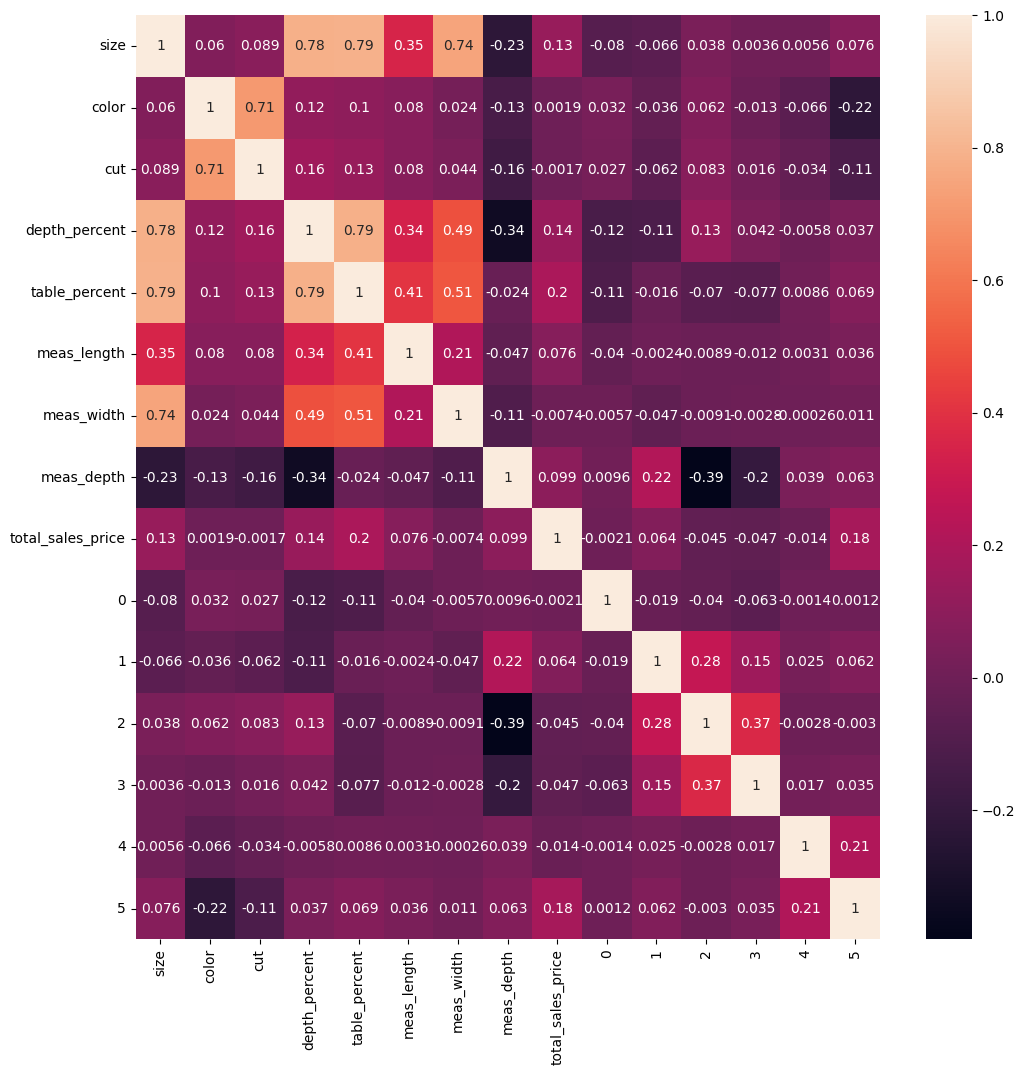

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True);

## MODELO 1

In [57]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [59]:
print(model1.intercept_, model1.coef_)

1770.424852045544 [ 3.08601209e+04 -2.45384553e+01  3.23456853e+01 -1.61763184e+03
 -3.21762360e+03 -1.87394345e+02  9.94413316e+02 -1.03466409e+03
  4.07231198e+02 -4.48271529e+01 -1.92877096e+02  1.33909550e+02
 -5.34029352e+01 -1.89540440e+03]


In [60]:
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from pylab import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [61]:
predictions = model1.predict(xtest)
predictions

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 1582.60057063, -5135.98362846, 60386.14832001, ...,
       -3304.30333663,   787.81882945,  2058.94326669])

In [62]:
df_test = pd.DataFrame(xtest)
df_test['predictions'] = predictions
df_test['total_sales_price'] = ytest
df_test['error'] = abs(df_test['predictions'] - df_test['total_sales_price'])
df_test

size  depth_percent  table_percent  meas_length  meas_width  \
98114   0.42           62.4           58.0         4.79        4.81   
8656    0.30           63.4           56.0         4.21        4.24   
218185  3.10           61.7           57.0         9.30        9.39   
76984   0.35           62.1           57.0         4.48        4.51   
142454  0.70           60.5           62.0         5.72        5.74   
...      ...            ...            ...          ...         ...   
152287  1.01           63.5           55.0         9.13        5.26   
184371  0.91           61.5           60.0         6.20        6.24   
46803   0.32           62.3           59.0         4.34        4.37   
36430   0.30           64.3           55.0         4.20        4.23   
21961   0.20           60.1           60.0         3.79        3.81   

        meas_depth   0  0  0  0  0  0  0  0   predictions  total_sales_price  \
98114         2.99  10  3  9  0  0  0  4  0   1582.600571               1512   
8656          2.68  10  7  4  5  0  4  2  0  -5135.983628                588   
218185        5.76  10  4  8  0  0  0  2  0  60386.148320              59788   
76984         2.79  10  3  7  0  0  0  2  0    193.983255               1118   
142454        3.47  10  5  7  0  0  0  2  0   3035.718677               3495   
...            ...  .. .. .. .. .. .. .. ..           ...                ...   
152287        3.34   7  5  5  0  4  4  5  2    370.426876               3844   
184371        3.83  10  1  7  0  0  0  2  0  11113.033538               8668   
46803         2.71  10  7  9  0  0  0  2  0  -3304.303337                904   
36430         2.71  10  0  4  5  4  0  2  0    787.818829                846   
21961         2.28  10  1  9  0  0  0  2  0   2058.943267                738   

              error  
98114     70.600571  
8656    5723.983628  
218185   598.148320  
76984    924.016745  
142454   459.281323  
...             ...  
152287  3473.573124  
184371  2445.033538  
46803   4208.303337  
36430     58.181171  
21961   1320.943267  

[43115 rows x 17 columns]

In [64]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions, ytest)

4664.540174506713

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions, ytest)

311527555.07921356

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predictions, ytest))

17650.14320279622

In [67]:
def train(x, y):
    model1= linear_model.LinearRegression()
    model1.fit(x,y)
    print(model1.intercept_)
    print(model1.coef_)
    mp = model1.predict(x)
    print('-'*100)
    print('MEAN SQUARED ERROR')
    print(mean_squared_error(y,mp))
    print('-'*100)
    print('R2 SCORE')
    print(r2_score(y,mp))

    return mp

In [68]:
train(xtrain,ytrain)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


1770.424852045544
[ 3.08601209e+04 -2.45384553e+01  3.23456853e+01 -1.61763184e+03
 -3.21762360e+03 -1.87394345e+02  9.94413316e+02 -1.03466409e+03
  4.07231198e+02 -4.48271529e+01 -1.92877096e+02  1.33909550e+02
 -5.34029352e+01 -1.89540440e+03]
----------------------------------------------------------------------------------------------------
MEAN SQUARED ERROR
260315382.63606167
----------------------------------------------------------------------------------------------------
R2 SCORE
0.6003539086106071


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([-2509.53836479,  1296.40701369,  1072.0889501 , ...,
        1417.63440551, -1288.47632397, -2649.36928874])

## MODELO 2

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rnd_reg = RandomForestRegressor(n_estimators = 200, 
                                max_depth = 4,
                                random_state = 42)
model2 = rnd_reg
model2.fit(xtrain, ytrain)

print("R2 score train",rnd_reg.score(xtrain,ytrain))
print("R2 score test",rnd_reg.score(xtest,ytest))

R2 score train 0.19520852270307532
R2 score test 0.19492605783825445


In [75]:
rnd_reg.feature_importances_

array([3.18953782e-02, 1.75426303e-04, 4.46778556e-06, 9.12665990e-05,
       4.27569262e-01, 5.54049066e-04, 3.24426957e-01, 1.03290761e-03,
       8.86423432e-02, 1.28141496e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.25595128e-01])

In [76]:
from sklearn.inspection import permutation_importance

perm_train = permutation_importance(estimator=rnd_reg,
                                    X = xtrain,
                                    y = ytrain,
                                    n_repeats = 10,
                                    random_state=42,
                                    scoring="r2")

In [77]:
from sklearn.base import clone 


model_clone = clone(rnd_reg)
model_clone.random_state = 42
model_clone.fit(xtrain, ytrain)
baseline_score = model_clone.score(xtrain, ytrain)
importances = []
    

for col in xtrain.columns:
    model_clone = clone(rnd_reg)
    model_clone.random_state = 42
    model_clone.fit(xtrain.drop(col, axis = 1), ytrain)
    drop_col_score = model_clone.score(xtrain.drop(col, axis = 1), ytrain)
    importances.append(baseline_score - drop_col_score)

In [78]:
drop_col_manual = pd.DataFrame(importances, 
                              xtrain.columns, 
                              columns = ["Drop columns importance"]).sort_values("Drop columns importance", ascending = False)
drop_col_manual

Drop columns importance
meas_width                8.109840e-02
0                         1.552163e-02
5                         2.970970e-03
size                      2.564176e-03
table_percent             3.546892e-04
meas_depth                1.606641e-04
meas_length               2.038403e-05
color                     6.132473e-06
depth_percent             3.915396e-06
2                         0.000000e+00
3                         0.000000e+00
4                         0.000000e+00
cut                      -2.721619e-07
1                        -3.703320e-07

## MODELO 3

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [80]:
from random import random


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('knn', KNeighborsClassifier())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('knn', KNeighborsClassifier())])

In [82]:
pipe2 = make_pipeline(StandardScaler(), PCA(n_components=5),KNeighborsClassifier())
pipe2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [83]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('knn', KNeighborsClassifier())])

In [84]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 3, 0, 1])

In [85]:
from sklearn.metrics import accuracy_score

print('Accuracy', accuracy_score(ytest,y_pred))

Accuracy 0.14108778847268932


In [86]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[2194, 1537,  909,  554,  389,  300,  198,  107,   18,   12],
       [2025, 3264, 1167,  736,  466,  287,  175,  102,   28,   10],
       [1586, 1669, 1173,  683,  447,  320,  179,   79,   26,   10],
       [1297, 1230,  909,  885,  586,  382,  213,   85,   21,   15],
       [1116,  929,  706,  685,  777,  472,  246,  109,   34,    9],
       [ 904,  763,  555,  580,  549,  526,  300,  142,   29,   13],
       [ 693,  587,  407,  356,  402,  380,  301,  156,   47,   15],
       [ 485,  369,  278,  274,  248,  235,  208,  176,   34,   13],
       [ 205,  198,  119,  125,  122,  138,  107,   94,   38,    8],
       [ 127,   94,   61,   63,   60,   58,   45,   44,   19,    9]])

In [87]:
pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('pca', PCA()),
                    ('knn', KNeighborsClassifier())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('knn', KNeighborsClassifier())])

## MODELO 4

In [88]:
from sklearn.model_selection import GridSearchCV

params = {
        'pca__n_components': list(range(1,10)),
        'knn__n_neighbors': list(range(1,20))
}
gs = GridSearchCV(pipe, params, cv=10, scoring='accuracy')

In [89]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [90]:
gs.best_score_

0.23706066936426945

In [91]:
gs.best_params_

{'knn__n_neighbors': 15, 'pca__n_components': 9}

In [92]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('knn', KNeighborsClassifier(n_neighbors=15))])

In [93]:
y_pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred)

0.23537052070045228

In [94]:
import pickle

with open('my_model', 'wb') as archivo_salida:
    pickle.dump(gs.best_estimator_, archivo_salida)

In [95]:
with open('my_model', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [96]:
loaded_model.score(X_test,y_test)

0.23537052070045228

## MODELO 5

In [97]:
from sklearn import model_selection

validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [98]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

xtrain_scaled = mms.fit_transform(X_train)

xtrain_scaled.shape

(172458, 14)

In [99]:
from sklearn.linear_model import LogisticRegression 

model5 = LogisticRegression(max_iter=1000)
model5.fit(xtrain_scaled,ytrain)

LogisticRegression(max_iter=1000)

In [100]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

xtrain_scaled = mms.fit_transform(X_test)

xtrain_scaled.shape

(43115, 14)

In [101]:
pred3 = model5.predict_proba(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [102]:
from sklearn.metrics import accuracy_score

print('Accuracy', accuracy_score(ytest,y_pred))

Accuracy 0.14709497854574974
